In [10]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

##
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)  ##不用指数
import pandas as pd

##keras模块
from keras.layers import Input,Dropout,Dense,LeakyReLU,Conv1D
from keras.models import Model,Sequential
from keras import regularizers
%matplotlib inline

In [2]:
data = pd.read_pickle('pickle/train_17_dummy.pkl')
#data = pd.read_csv('pca_Q1_173.csv')
#data = pd.read_csv('ori_729.csv')
data.shape

(1974, 17)

In [3]:
from sklearn.model_selection import train_test_split
y = data['IC50_nM']
#X = data.drop(labels=['IC50_nM','SMILES','pIC50'],axis=1)
X = data.drop(labels=['IC50_nM'],axis=1)

In [4]:
# std1 = MinMaxScaler()
# X=std1.fit_transform(X)
# std2 = MinMaxScaler()
# y=std2.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=666)
x_train.shape

(1776, 16)

In [5]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot) )
K.epsilon()

1e-07

In [6]:
print(tf.keras.losses.mean_squared_error)

<function mean_squared_error at 0x000001C1B7543550>


In [8]:
#Buildling and training the model 有两层正则化项
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=16))
model.add(Conv1D())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(1, activation='linear'))
#print(model.summary)
model.compile(optimizer='adam', loss='mean_squared_error',metrics=[coeff_determination])
history = model.fit(x_train,y_train, validation_data=(x_test, y_test),epochs=50, batch_size=200)

Epoch 1/50
9/9 [==============================] - 0s 20ms/step - loss: 12269728768.0000 - coeff_determination: -0.1131 - val_loss: 1874889344.0000 - val_coeff_determination: -0.0339
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 12269694976.0000 - coeff_determination: -0.1054 - val_loss: 1874876544.0000 - val_coeff_determination: -0.0339
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 12269686784.0000 - coeff_determination: -0.1568 - val_loss: 1874871936.0000 - val_coeff_determination: -0.0339
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 12269681664.0000 - coeff_determination: -0.1529 - val_loss: 1874869120.0000 - val_coeff_determination: -0.0339
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 12269679616.0000 - coeff_determination: -0.1395 - val_loss: 1874867072.0000 - val_coeff_determination: -0.0339
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 12269675520.0000 - coeff

In [8]:
history = model.fit(x_train,y_train, validation_data=(x_test, y_test),epochs=50, batch_size=200)

Epoch 1/50
9/9 [==============================] - 0s 8ms/step - loss: 12177856512.0000 - coeff_determination: -0.0658 - val_loss: 1780615936.0000 - val_coeff_determination: 0.0181
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 12177344512.0000 - coeff_determination: -0.0721 - val_loss: 1779896960.0000 - val_coeff_determination: 0.0185
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 12177364992.0000 - coeff_determination: -0.0568 - val_loss: 1779587328.0000 - val_coeff_determination: 0.0186
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 12176342016.0000 - coeff_determination: -0.0424 - val_loss: 1778608128.0000 - val_coeff_determination: 0.0192
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 12175393792.0000 - coeff_determination: -0.0666 - val_loss: 1777965184.0000 - val_coeff_determination: 0.0195
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 12175870976.0000 - coeff_deter

In [9]:
history.history

{'loss': [12177856512.0,
  12177344512.0,
  12177364992.0,
  12176342016.0,
  12175393792.0,
  12175870976.0,
  12174484480.0,
  12173605888.0,
  12173449216.0,
  12172544000.0,
  12172653568.0,
  12171397120.0,
  12170669056.0,
  12169905152.0,
  12169253888.0,
  12168683520.0,
  12168044544.0,
  12167613440.0,
  12166289408.0,
  12165895168.0,
  12164775936.0,
  12164342784.0,
  12163095552.0,
  12162121728.0,
  12161734656.0,
  12160288768.0,
  12159927296.0,
  12158876672.0,
  12157493248.0,
  12157022208.0,
  12156266496.0,
  12154941440.0,
  12153726976.0,
  12152410112.0,
  12151407616.0,
  12150349824.0,
  12149280768.0,
  12148037632.0,
  12147113984.0,
  12145691648.0,
  12145357824.0,
  12143055872.0,
  12143042560.0,
  12140228608.0,
  12139209728.0,
  12138029056.0,
  12137073664.0,
  12135686144.0,
  12133875712.0,
  12132620288.0],
 'coeff_determination': [-0.06577586382627487,
  -0.07208910584449768,
  -0.05684734135866165,
  -0.0423889085650444,
  -0.0665651261806488,


In [10]:
#传入fig 保存成高清矢量图
def save_svg(fig,name):
    fig.savefig(name, dpi=600, format='svg',bbox_inches = 'tight')

<Figure size 1440x576 with 0 Axes>

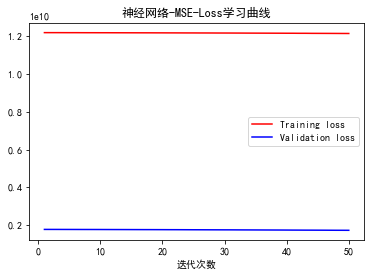

In [11]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


plt.figure(figsize=(20, 8))
fig, ax = plt.subplots()
plt.title('神经网络-MSE-Loss学习曲线')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()
plt.xlabel('迭代次数')

save_svg(plt,'Q2-NN-mse.svg')
plt.show()

In [12]:
from sklearn.metrics import r2_score
pred_label = model.predict(x_test)
r2_score(y_test,pred_label)

0.04432964833052555